In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
dataset=pd.read_csv('Reviews.tsv', sep='\t')

In [8]:
dataset.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [10]:
dataset.shape

(1000, 2)

In [12]:
dataset.value_counts()


Review                                                                                                                        Liked
I won't be back.                                                                                                              0        2
The food was terrible.                                                                                                        0        2
I would not recommend this place.                                                                                             0        2
I love this place.                                                                                                            1        2
The folks at Otto always make us feel so welcome and special.                                                                 1        1
                                                                                                                                      ..
I will be back many times soon.               

In [9]:
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [18]:
dataset['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

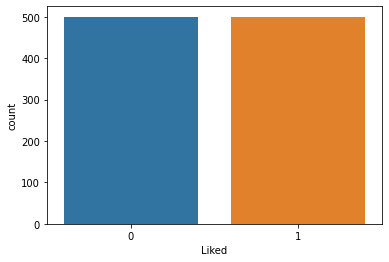

In [17]:
sns.countplot(data=dataset,x='Liked')# here the likes and unlikes are in equal form

In [13]:
!pip install wordcloud 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import re
review = re.sub('[^a-zA-Z]',' ', dataset['Review'][0])
review

'Wow    Loved this place '

In [20]:
review = review.lower()
review

'wow    loved this place '

In [21]:
review = review.split()
review

['wow', 'loved', 'this', 'place']

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['wow', 'love', 'place']

In [23]:
review = ' '.join(review)
review

'wow love place'

In [25]:
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [26]:
corpus[:15]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair']

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [30]:
y_pred = classifier.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

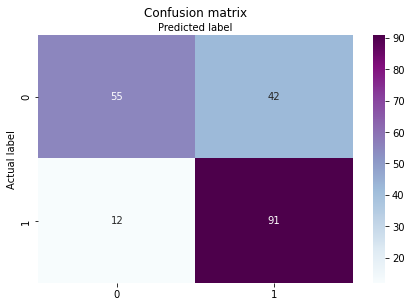

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Classification_report**

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200




**PREDICTION**

In [35]:
def predict_review(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [42]:
result = ['Negetive Review 👎','Positive Review 👍']

In [43]:
msg = 'The food is really good here.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Positive Review 👍


In [44]:
msg = 'Food was pretty bad and the service was very slow.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Negetive Review 👎


In [45]:
msg = 'The food was terrible.'

if predict_review(msg):
    print(result[1])
else:
    print(result[0])

Negetive Review 👎
